##  Dates and Times in Python

The Python world has a number of available representations of dates, times, deltas, and timespans. While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other packages used in Python.

####  Native Python dates and times: 'datetime' and 'dateutil'

In [6]:
from datetime import datetime
datetime(year=2015, month=7, day=4) # add luon int

datetime.datetime(2015, 7, 4, 0, 0)

In [7]:
from dateutil import parser
date = parser.parse("4th of July, 2015") # chuyen tu tex sang int
date


datetime.datetime(2015, 7, 4, 0, 0)

In [9]:
date.strftime('%A') #%A lay theo ngay

'Saturday'

The power of datetime and dateutil lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in. Where they break down is when you wish to work with large arrays of dates and times: just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

###  Typed arrays of times: NumPy's

The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy. The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The datetime64 requires a very specific input format:

In [14]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [15]:
date + np.arange(12)


array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [16]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [17]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

###    Dates and times in pandas: best of both worlds

In [18]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [19]:
date.strftime('%A')


'Saturday'

In [21]:
date + pd.to_timedelta(np.arange(12), 'D')# vectorized operations 

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

In [22]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [25]:
data['2014-07-04':'2015-07-04'] # lay thong tin theo day start to day end

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [26]:
data['2015'] # lay theo year

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures

In [27]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

optimal all list type pandas.core.indexes.datetimes.DatetimeIndex ve cung 1 dinh dang/


In [30]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [31]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

###  Regular sequences: 

In [34]:
pd.date_range('2015-07-03', '2015-07-10') # bat dau vs khoang thoi gian

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.date_range('2015-07-03', periods=8) #thay doi thoi gian hang cho

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [36]:
pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [38]:
pd.period_range('2015-07', periods=8, freq='M') # tang chuoi them 1 gio cach nhau

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [42]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html
https://docs.python.org/3/library/datetime.html
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior


##  Frequencies and Offsets

In [43]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')


Code	Description	Code	Description
MS	Month start		 BMS	Business month start

QS	Quarter start		BQS	Business quarter start

AS	Year start		BAS	Business year start

Additionally, you can change the month used to mark 

any quarterly or annual code by adding a three-letter 
month code as a suffix:

Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.
In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

W-SUN, W-MON, W-TUE, W-WED, etc.
On top of this, codes can be combined with numbers to specify other frequencies. For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:

In [56]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

### Resampling, Shifting, and Windowing

In [72]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',  data_source == 'yahoo')
goog.head()

SyntaxError: positional argument follows keyword argument (<ipython-input-72-4f939e7634d0>, line 3)

In [71]:
goog = goog['Close']

NameError: name 'goog' is not defined

##  Where to Learn More

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html 
http://shop.oreilly.com/product/0636920023784.do

This section has provided only a brief summary of some of the most essential features of time series tools provided by Pandas; for a more complete discussion, you can refer to the "Time Series/Date" section of the Pandas online documentation.

Another excellent resource is the textbook Python for Data Analysis by Wes McKinney (OReilly, 2012). Although it is now a few years old, it is an invaluable resource on the use of Pandas. In particular, this book emphasizes time series tools in the context of business and finance, and focuses much more on particular details of business calendars, time zones, and related topics.

As always, you can also use the IPython help functionality to explore and try further options available to the functions and methods discussed here. I find this often is the best way to learn a new Python tool.

#  Example: Visualizing Seattle Bicycle Counts

In [78]:
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [92]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [93]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,64934.000000,64934.000000,64934.000000
mean,113.805033,51.976191,61.828842
std,145.235402,67.013247,90.605138
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,70.000000,74.000000
max,1097.000000,698.000000,850.000000


## Visualizing the data 

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline
import seaborn; seaborn.set()

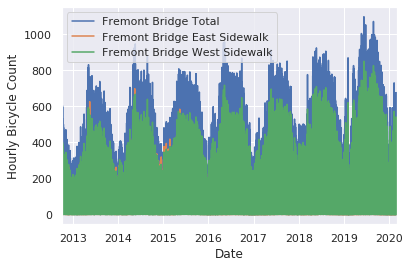

In [85]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

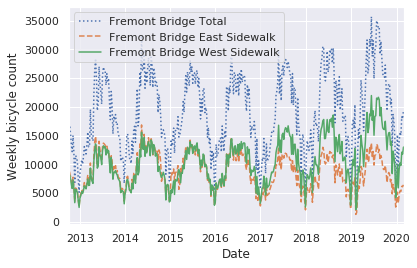

In [86]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

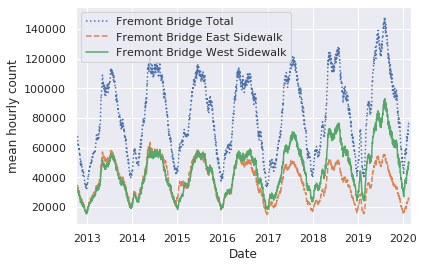

In [88]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

aggregating tong hop, nhan vao, them vao


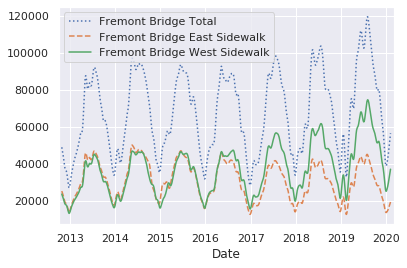

In [89]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

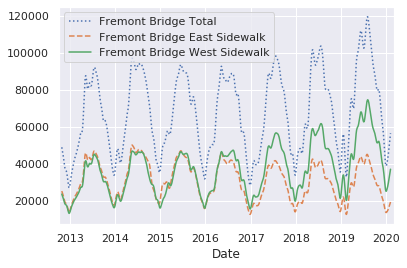

In [91]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

##  Digging into the data

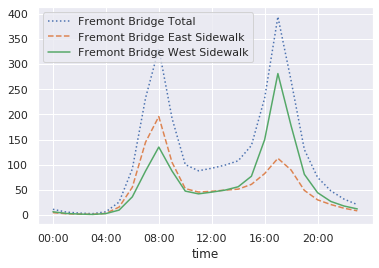

In [94]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

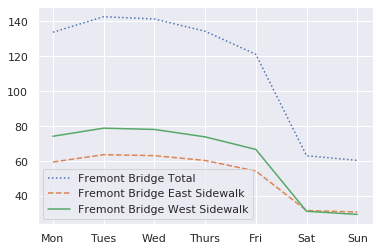

In [95]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [96]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

AttributeError: 'DataFrame' object has no attribute 'ix'

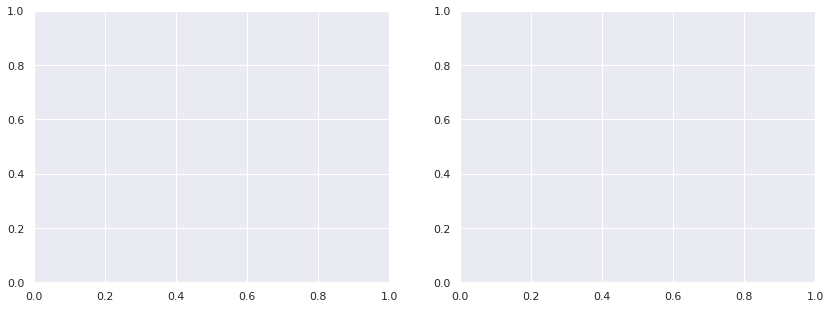

In [97]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);